In [1]:
%load_ext autoreload
%autoreload 2
# %cd /p/mmcardiac/Jerry/code/CINE-DENSE-Translation
%cd /home/jx8fh/Projects/LaMoD
import numpy as np
import torch
import matplotlib.pyplot as plt
from pathlib import Path
from modules.data import check_dict

/sfs/gpfs/tardis/home/jx8fh/Projects/LaMoD


# Showcase

## 1 DENSE/cine displacment prediction std

In [2]:
# load data

In [71]:
# showcase data indices
DENSE_showcase_indices = [85, 1]
DENSE_showcase_data_fnames_disp = [
    '/scratch/jx8fh/2025-01-16-LaMoD-variability-split-100/DENSE/LaMoD-DENSE-085-UVA_05192021-76.npy',
    '/scratch/jx8fh/2025-01-16-LaMoD-variability-split-100/DENSE/LaMoD-DENSE-001-033-86.npy'
]
DENSE_showcase_data_fnames_strain = [
    '/scratch/jx8fh/2025-01-16-LaMoD-variability-split-100/DENSE_strain/LaMoD-DENSE-085-UVA_05192021-76.npy',
    '/scratch/jx8fh/2025-01-16-LaMoD-variability-split-100/DENSE_strain/LaMoD-DENSE-001-033-86.npy'
]
DENSE_showcase_data_skipdiffusion_fnames = [
    '/scratch/jx8fh/2025-01-04-LaMoD-variability/DENSE/LaMoD-DENSE-SkipDiffusion-085-UVA_05192021-76.npy',
    '/scratch/jx8fh/2025-01-04-LaMoD-variability/DENSE/LaMoD-DENSE-SkipDiffusion-001-033-86.npy'
]
DENSE_showcase_ES_frame = [22, 24]
cine_showcase_indices = [86, 74]
cine_showcase_data_fnames_disp = [
    '/scratch/jx8fh/2025-01-16-LaMoD-variability-split-100/cine/LaMoD-cine-086-UVA04--36.npy',
    '/scratch/jx8fh/2025-01-16-LaMoD-variability-split-100/cine/LaMoD-cine-074-124-47.npy'
]
cine_showcase_data_fnames_strain = [
    '/scratch/jx8fh/2025-01-16-LaMoD-variability-split-100/cine_strain/LaMoD-cine-086-UVA04--36.npy',
    '/scratch/jx8fh/2025-01-16-LaMoD-variability-split-100/cine_strain/LaMoD-cine-074-124-47.npy'
]
# cine_showcase_ES_frame = [22, 24]
cine_showcase_data_skipdiffusion_fnames = [
    '/scratch/jx8fh/2025-01-04-LaMoD-variability/cine/LaMoD-cine-SkipDiffusion-086-UVA04--36.npy',
    '/scratch/jx8fh/2025-01-04-LaMoD-variability/cine/LaMoD-cine-SkipDiffusion-074-124-47.npy'
]

In [3]:
end_sys_DENSE_frame_indices = {
    '033': 24,#
    '122': 26,#
    '124': 22,#
    '125': 22,#
    '136': 26,#
    '146': 19,#
    '17': 20,
    'CRT104': 22,
    'CT01': 12,#
    'CT03': 12,
    'CT22': 12,#
    'CT40': 8,
    'Emory_04': 20,#
    'Emory_06': 20,#
    'Emory_07': 20,#
    'Lyon69_ene_al': 25,
    'Lyon_Cha_Jea': 20,
    'Lyon_Ene_Alex': 22,
    'Lyon_d04_scanA': 22,
    'OB015': 20,#
    'OB016': 17,#
    'OB017': 17,#
    'OB018': 17,#
    'OB019': 17,#
    'P117': 20,
    'StFrancis_DENSE10A': 22,
    'StFrancis_DENSE11A': 22,
    'UVA_04': 25,#
    'UVA_05': 20,#
    'UVA_05192021': 22,
    'UVA_07': 22,# 20->22
    'UVA_08_A_U1': 22,#
    'UVA_09_A_U1': 22,#
    'UVA_11_A_U1': 25,#
}

LMA_flag = {
    '033': True,
    '122': True,
    '124': True,
    '125': True,
    '136': True,
    '146': True,
    '17': False,
    'CRT104': True,
    'CT01': True,
    'CT03': False,
    'CT22': False,
    'CT40': True,
    'Emory_04': False,
    'Emory_06': False,
    'Emory_07': False,
    'Lyon69_ene_al': False,
    'Lyon_Cha_Jea': True,
    'Lyon_Ene_Alex': False,
    'Lyon_d04_scanA': False,
    'OB015': False,
    'OB016': False,
    'OB017': True,
    'OB018': False,
    'OB019': False,
    'P117': True,
    'StFrancis_DENSE10A': False,
    'StFrancis_DENSE11A': False,
    'UVA_04': False,
    'UVA_05': False,
    'UVA_05192021': False,
    'UVA_07': False,
    'UVA_08_A_U1': False,
    'UVA_09_A_U1': False,
    'UVA_11_A_U1': False,
}

In [60]:
# Load data

# DENSE_showcase_data_preds_disp = [np.load(fname, allow_pickle=True).tolist() for fname in DENSE_showcase_data_fnames_disp]
# DENSE_showcase_data_preds_strain = [np.load(fname, allow_pickle=True).tolist() for fname in DENSE_showcase_data_fnames_strain]
DENSE_showcase_data_skipdiffusion_preds = [np.load(fname, allow_pickle=True).tolist() for fname in DENSE_showcase_data_skipdiffusion_fnames]
cine_showcase_data_preds_disp = [np.load(fname, allow_pickle=True).tolist() for fname in cine_showcase_data_fnames_disp]
cine_showcase_data_preds_strain = [np.load(fname, allow_pickle=True).tolist() for fname in cine_showcase_data_fnames_strain]
cine_showcase_data_skipdiffusion_preds = [np.load(fname, allow_pickle=True).tolist() for fname in cine_showcase_data_skipdiffusion_fnames]

In [5]:
len(cine_showcase_data_preds_disp)

2

In [6]:
len(cine_showcase_data_preds_disp[0])

100

In [7]:
len(cine_showcase_data_preds_strain[0])

100

In [72]:
from copy import deepcopy
def get_full_pred_from_fnames(disp_pred_fnames, strain_pred_fnames):
    disp_preds = [np.load(fname, allow_pickle=True).tolist() for fname in disp_pred_fnames]
    strain_preds = [np.load(fname, allow_pickle=True).tolist() for fname in strain_pred_fnames]
    return merge_cine_disp_strain(disp_preds, strain_preds)

def merge_cine_disp_strain(disp_preds, strain_preds):
    preds = []
    for disp_pred, strain_pred in zip(disp_preds, strain_preds):
        pred = deepcopy(disp_pred)
        for repeat_idx in range(len(pred)):
            pred[repeat_idx].update(strain_pred[repeat_idx])
        # cine_pred.update(cine_pred_strain)
        preds.append(pred)
    return preds
cine_showcase_data_preds = merge_cine_disp_strain(cine_showcase_data_preds_disp, cine_showcase_data_preds_strain)
DENSE_showcase_data_preds = get_full_pred_from_fnames(DENSE_showcase_data_fnames_disp, DENSE_showcase_data_fnames_strain)

In [32]:
# cine_showcase_data_preds = merge_cine_disp_strain(cine_showcase_data_preds_disp, cine_showcase_data_preds_strain)
# from copy import deepcopy
# cine_showcase_data_preds = []
# for cine_pred_disp, cine_pred_strain in zip(cine_showcase_data_preds_disp, cine_showcase_data_preds_strain):
#     cine_pred = deepcopy(cine_pred_disp)
#     for repeat_idx in range(len(cine_pred)):
#         cine_pred[repeat_idx].update(cine_pred_strain[repeat_idx])
#     # cine_pred.update(cine_pred_strain)
#     cine_showcase_data_preds.append(cine_pred)

In [6]:
DENSE_showcase_data_fnames

['/scratch/jx8fh/2025-01-04-LaMoD-variability/DENSE/LaMoD-DENSE-085-UVA_05192021-76.npy',
 '/scratch/jx8fh/2025-01-04-LaMoD-variability/DENSE/LaMoD-DENSE-001-033-86.npy']

In [9]:
segment_names = [
    'Inferoseptal',
    'Inferior',
    'Inferolateral',
    'Anterolateral',
    'Anterior',
    'Anteroseptal'
]

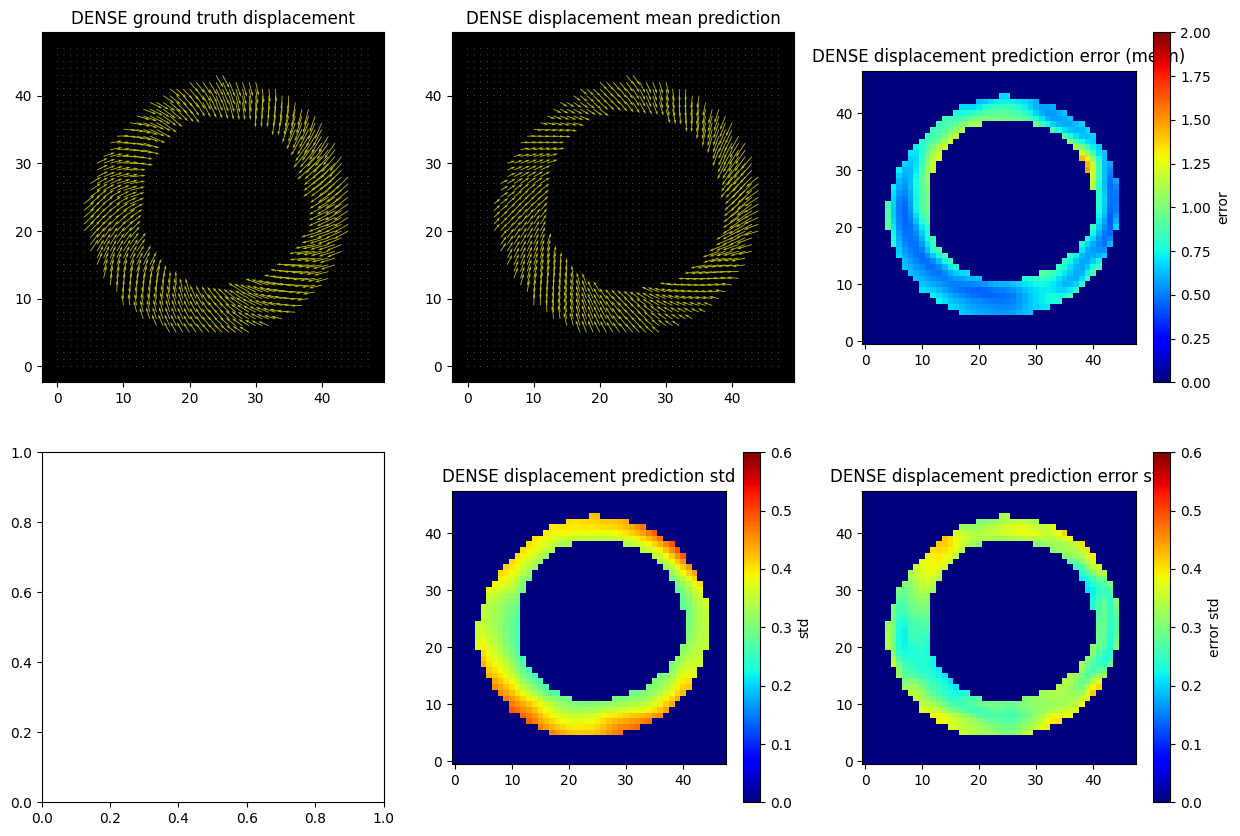

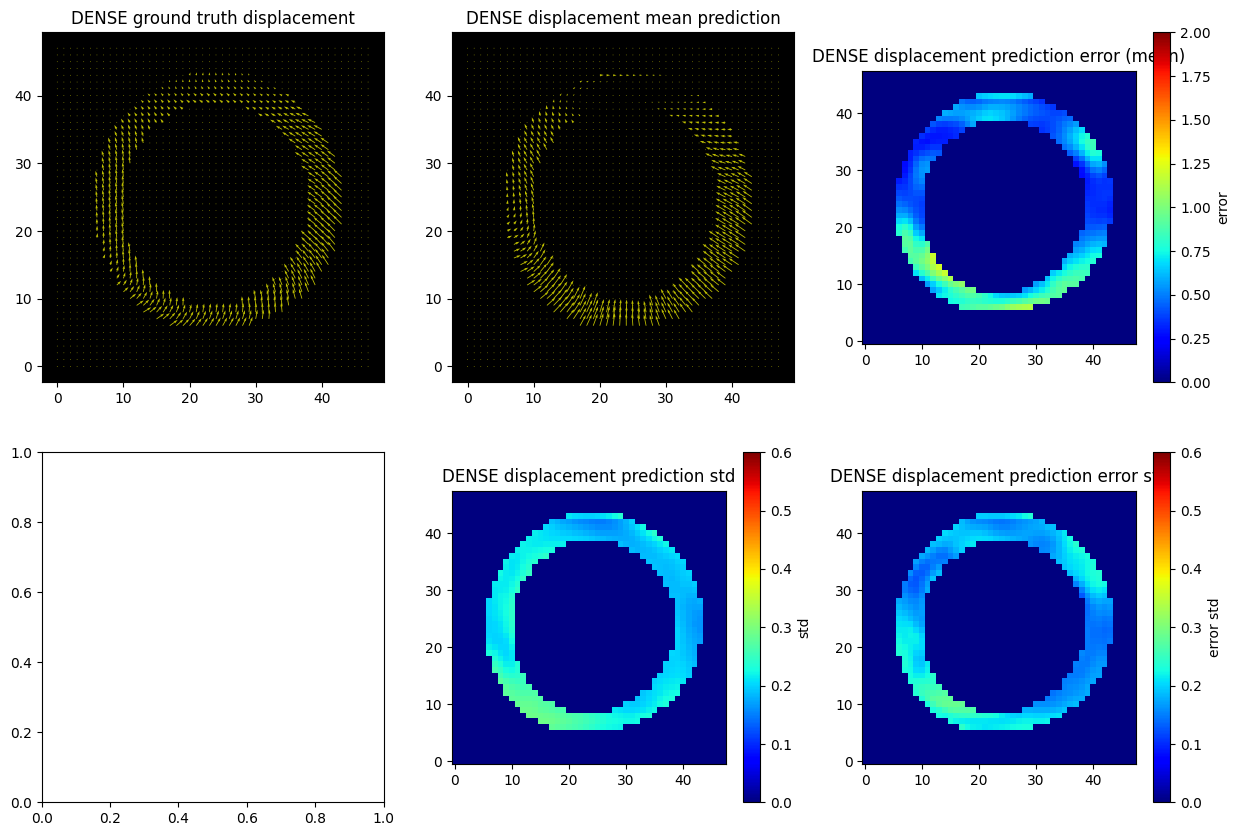

In [64]:
# DENSE showcase displacement prediction std and displacement prediction error std
def epe_error(output, target):
    epe = np.sqrt(((output[:, 0, :, :, :] - target[:, 0, :, :, :])**2.0 
                 + (output[:, 1, :, :, :] - target[:, 1, :, :, :])**2.0))
    return epe
for preds_idx, preds in enumerate(DENSE_showcase_data_preds):
    pred_disps = [datum['disp_pred']*1.5 for datum in preds]
    gt_disps = [datum['disp_GT'][...,:-1] for datum in preds]
    
    pred_disps_std = np.mean(np.std(pred_disps, axis=0), axis=0)
    pred_pixelwise_mean_error = np.mean([epe_error(pred[None], gt[None])[None] for pred, gt in zip(pred_disps, gt_disps)], axis=0)
    pred_pixelwise_error_std = np.std([epe_error(pred[None], gt[None])[None] for pred, gt in zip(pred_disps, gt_disps)], axis=0)

    fig, axs = plt.subplots(2, 3, figsize=(15, 10))
    # GT Displacement Field
    axs[0,0].quiver(
        gt_disps[0][0,...,10],
        gt_disps[0][1,...,10],
        scale=1,
        units='xy',
        color='y')
    # set black background
    axs[0,0].set_facecolor('black')
    axs[0,0].set_title('DENSE ground truth displacement')

    # Mean Predicted Displacement Field
    pred_disps_mean_X = np.mean([disp[0] for disp in pred_disps], axis=0)#*1.5
    pred_disps_mean_Y = np.mean([disp[1] for disp in pred_disps], axis=0)#*1.5
    axs[0,1].quiver(
        pred_disps_mean_X[...,10], 
        pred_disps_mean_Y[...,10],
        scale=1,
        units='xy',
        color='y',
    )
    # set black background
    axs[0,1].set_facecolor('black')
    axs[0,1].set_title('DENSE displacement mean prediction')

    # Predicted Displacement Field std
    axs[1,1].imshow(pred_disps_std[...,10], cmap='jet', vmin=0, vmax=0.6)
    axs[1,1].set_title('DENSE displacement prediction std')
    axs[1,1].invert_yaxis()
    # show colorbar
    cbar = fig.colorbar(axs[1,1].images[0])
    cbar.set_label('std')
    # make background black
    # axs[1,0].set_facecolor('black')

    

    # Predicted Displacement Field error (mean vs GT)
    axs[0,2].imshow(pred_pixelwise_mean_error[0,0,...,10], cmap='jet', vmin=0, vmax=2)
    axs[0,2].set_title('DENSE displacement prediction error (mean)')
    axs[0,2].invert_yaxis()
    # show colorbar
    cbar = fig.colorbar(axs[0,2].images[0])
    cbar.set_label('error')


    # Predicted Displacement Field error std
    axs[1,2].imshow(pred_pixelwise_error_std[0,0,...,10], cmap='jet', vmin=0, vmax=0.6)
    axs[1,2].set_title('DENSE displacement prediction error std')
    axs[1,2].invert_yaxis()
    # show colorbar
    cbar = fig.colorbar(axs[1,2].images[0])
    cbar.set_label('error std')

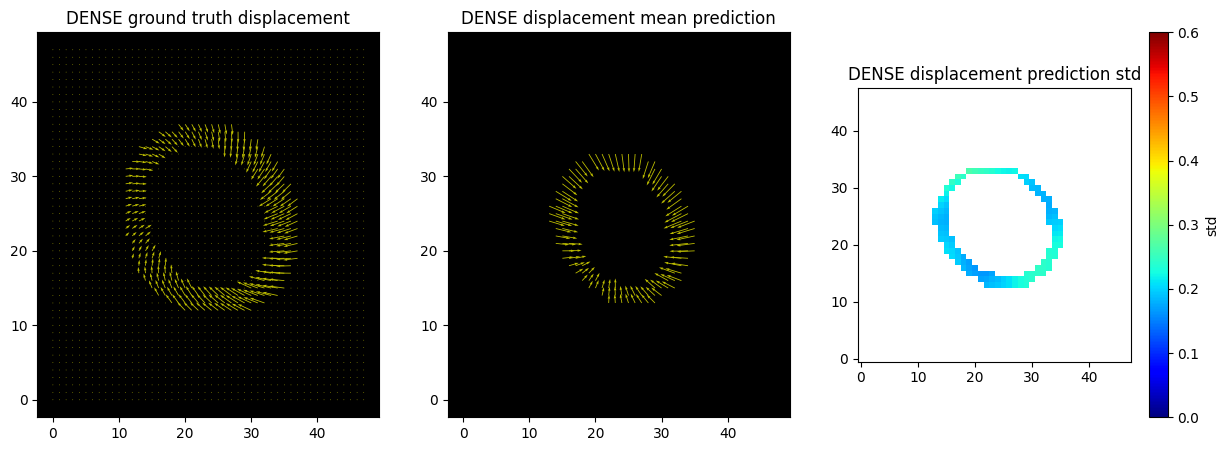

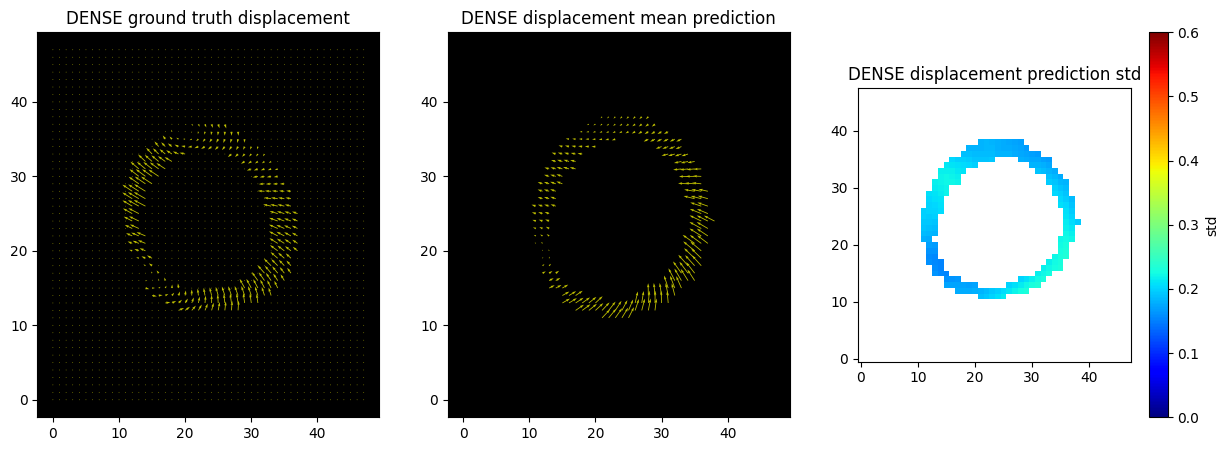

In [73]:
# cine showcase displacement prediction std
# def epe_error(output, target):
#     epe = np.sqrt(((output[:, 0, :, :, :] - target[:, 0, :, :, :])**2.0 
#                  + (output[:, 1, :, :, :] - target[:, 1, :, :, :])**2.0))
#     return epe
for preds_idx, preds in enumerate(cine_showcase_data_preds):
    pred_disps = [datum['disp_pred'] for datum in preds]
    gt_disps = [datum['disp_GT'][...,:-1] for datum in preds]
    
    pred_disps_std = np.mean(np.std(pred_disps, axis=0), axis=0)
    # pred_pixelwise_mean_error = np.mean([epe_error(pred[None], gt[None])[None] for pred, gt in zip(pred_disps, gt_disps)], axis=0)
    # pred_pixelwise_error_std = np.std([epe_error(pred[None], gt[None])[None] for pred, gt in zip(pred_disps, gt_disps)], axis=0)

    fig, axs = plt.subplots(1, 3, figsize=(15, 5))
    axs = axs.reshape((1,3))

    # GT Displacement Field
    axs[0,0].quiver(
        gt_disps[0][0,...,10],
        gt_disps[0][1,...,10],
        scale=1,
        units='xy',
        color='y')
    # set black background
    axs[0,0].set_facecolor('black')
    axs[0,0].set_title('DENSE ground truth displacement')

    # Mean Predicted Displacement Field
    pred_disps_mean_X = np.mean([disp[0] for disp in pred_disps], axis=0)
    pred_disps_mean_Y = np.mean([disp[1] for disp in pred_disps], axis=0)
    axs[0,1].quiver(
        pred_disps_mean_X[...,10], 
        pred_disps_mean_Y[...,10],
        scale=1,
        units='xy',
        color='y',
    )
    # set black background
    axs[0,1].set_facecolor('black')
    axs[0,1].set_title('DENSE displacement mean prediction')

    # Predicted Displacement Field std
    axs[0,2].imshow(pred_disps_std[...,10], cmap='jet', vmin=0, vmax=0.6)
    axs[0,2].set_title('DENSE displacement prediction std')
    axs[0,2].invert_yaxis()
    # show colorbar
    cbar = fig.colorbar(axs[0,2].images[0])
    cbar.set_label('std')

# DENSE/cine showcase
disp Pred Strain Pred strain curves
disp GT   Strain GT

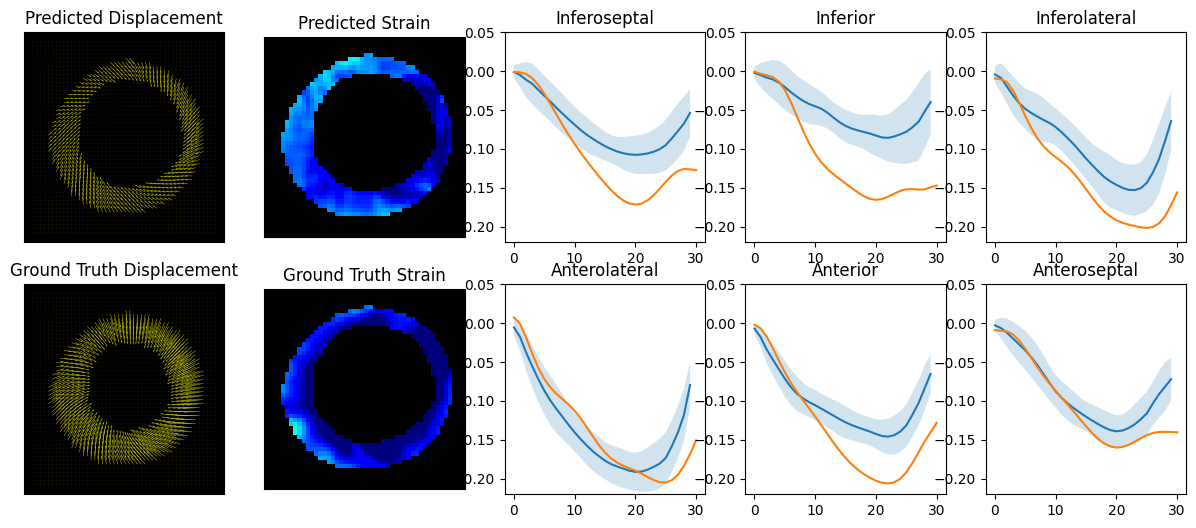

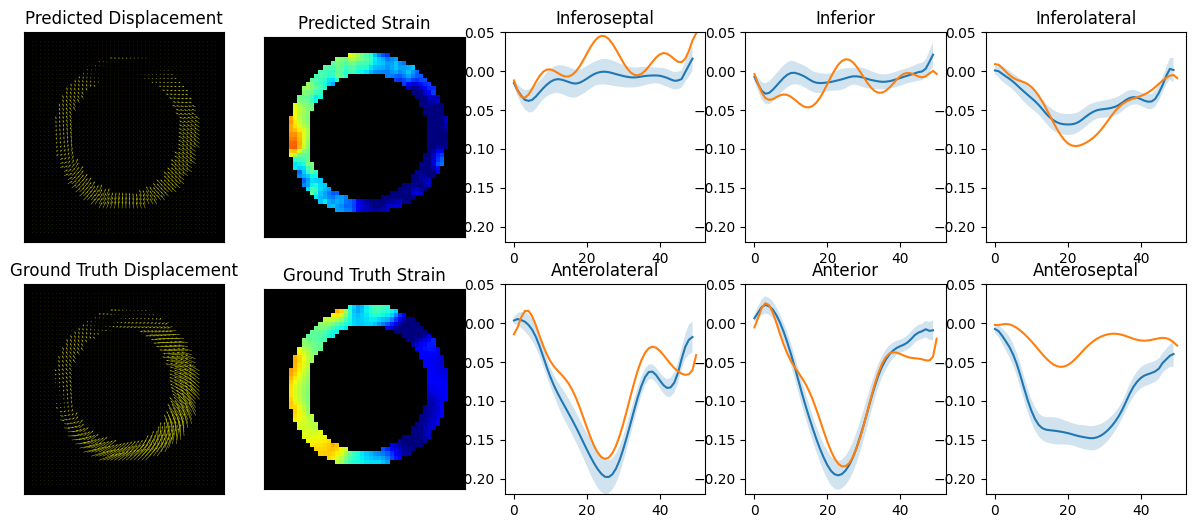

In [74]:
for preds_idx, preds in enumerate(DENSE_showcase_data_preds):
    pred_disps = [datum['disp_pred']*1.5 for datum in preds]
    pred_disp_skipdiffusion = [datum['disp_pred']*1.5 for datum in DENSE_showcase_data_skipdiffusion_preds[preds_idx]][0]
    gt_disps = [datum['disp_GT'][...,:-1] for datum in preds]

    # datum_patient_id = test_DENSE_data[check_datum_idx]['patient_id']
    datum_ES_frame = DENSE_showcase_ES_frame[preds_idx]
    # datum_ES_time = test_DENSE_data[check_datum_idx]['DENSE_frame_time_stamps'][datum_ES_frame]
    

    pred_disps_mean_X = np.mean([disp[0] for disp in pred_disps], axis=0)#*1.5
    pred_disps_mean_Y = np.mean([disp[1] for disp in pred_disps], axis=0)#*1.5

    pred_strains = [datum['strain_pred']*1.5 for datum in preds]
    pred_strain_mean = np.mean([strain for strain in pred_strains], axis=0)
    # pred_strain_mean = preds[0]['strain_pred']*1.5
    pred_strain_skipdiffusion = [datum['strain_pred']*1.5 for datum in DENSE_showcase_data_skipdiffusion_preds[preds_idx]][0]
    gt_strain = preds[0]['strain_GT']

    fig, axs = plt.subplots(2, 5, figsize=(15, 6))
    # Predicted Displacements Field
    axs[0,0].quiver(
        pred_disps_mean_X[...,10], 
        pred_disps_mean_Y[...,10], 
        color='y', 
        scale=1,
        scale_units='xy')
    axs[0,0].set_title('Predicted Displacement')
    axs[0,0].set_facecolor('black')
    axs[0,0].set_xticks([])
    axs[0,0].set_yticks([])

    # GT Displacements Field
    axs[1,0].quiver(
        gt_disps[0][0,...,datum_ES_frame],
        gt_disps[0][1,...,datum_ES_frame],
        color='y',
        scale=1,
        scale_units='xy')
    axs[1,0].set_title('Ground Truth Displacement')
    axs[1,0].set_facecolor('black')
    axs[1,0].set_xticks([])
    axs[1,0].set_yticks([])

    # Predicted Strain Image
    axs[0,1].imshow(pred_strain_mean[...,datum_ES_frame], cmap='jet', vmin=-0.2, vmax=0.2)
    # axs[0,1].imshow(pred_strain_skipdiffusion[...,10], cmap='jet', vmin=-0.2, vmax=0.2)
    axs[0,1].set_title('Predicted Strain')
    axs[0,1].set_facecolor('black')
    axs[0,1].invert_yaxis()
    axs[0,1].set_xticks([])
    axs[0,1].set_yticks([])
    # colorbar
    # cbar = fig.colorbar(axs[0,1].images[0], ax=axs[0,1])
    # cbar.set_label('Strain')

    # GT Strain Image
    axs[1,1].imshow(gt_strain[...,datum_ES_frame], cmap='jet', vmin=-0.2, vmax=0.2)
    axs[1,1].set_title('Ground Truth Strain')
    axs[1,1].set_facecolor('black')
    axs[1,1].invert_yaxis()
    axs[1,1].set_xticks([])
    axs[1,1].set_yticks([])
    # colorbar
    # cbar = fig.colorbar(axs[1,1].images[0], ax=axs[1,1])
    # cbar.set_label('Strain')

    # Strain curves
    n_sectors = 6
    # fig, axs = plt.subplots(2, n_sectors, figsize=(n_sectors*2, 5))
    for sector_idx in range(n_sectors):
        row_idx = sector_idx // 3
        col_idx = sector_idx % 3
        sector_strain_curves_pred_mean = np.mean([pred['CCs6_pred'][sector_idx]*1.5 for pred in preds], axis=0)
        sector_strain_curves_pred_std = np.std([pred['CCs6_pred'][sector_idx]*1.5 for pred in preds], axis=0)

        sector_strain_curves_GT_mean = np.mean([pred['CCs6_GT'][sector_idx] for pred in preds], axis=0)
        # sector_strain_curves_GT_std = np.std([pred['CCs6_GT'][sector_idx] for pred in trial_data], axis=0)

        axs[row_idx, col_idx+2].plot(sector_strain_curves_pred_mean, label='Predicted')
        axs[row_idx, col_idx+2].fill_between(np.arange(len(sector_strain_curves_pred_mean)), sector_strain_curves_pred_mean - sector_strain_curves_pred_std, sector_strain_curves_pred_mean + sector_strain_curves_pred_std, alpha=0.2)
        axs[row_idx, col_idx+2].plot(sector_strain_curves_GT_mean, label='Ground Truth')
        # axs[0, sector_idx].fill_between(np.arange(len(sector_strain_curves_GT_mean)), sector_strain_curves_GT_mean - sector_strain_curves_GT_std, sector_strain_curves_GT_mean + sector_strain_curves_GT_std, alpha=0.2)

        # set the y-axis between -0.25 and 0.05
        axs[row_idx, col_idx+2].set_ylim([-0.22, 0.05])
        axs[row_idx, col_idx+2].set_title(f'{segment_names[sector_idx]}')


In [75]:
from skimage.transform import resize
from copy import deepcopy
def zoom_img(image, scale=1.0):
    # rescale image and crop / pad to keep original shape
    h, w = image.shape[:2]
    new_h = int(h * scale)
    new_w = int(w * scale)

    left_pad = (new_w - w) // 2
    right_pad = (new_w - w) - left_pad
    top_pad = (new_h - h) // 2
    bottom_pad = (new_h - h) - top_pad

    image_resize = resize(image, (new_h, new_w), order=3)
    image_resize_crop = image_resize[top_pad:new_h - bottom_pad, left_pad:new_w - right_pad]
    return image_resize_crop

def zoom_img_with_nan(image_raw, scale=1.0):
    image = deepcopy(image_raw)
    # rescale image and crop / pad to keep original shape
    h, w = image.shape[:2]
    new_h = int(h * scale)
    new_w = int(w * scale)
    
    left_pad = (new_w - w) // 2
    right_pad = (new_w - w) - left_pad
    top_pad = (new_h - h) // 2
    bottom_pad = (new_h - h) - top_pad

    # print(left_pad, right_pad, top_pad, bottom_pad)
    nan_mask = np.isnan(image)
    # nan_mask = image<0.5
    image[nan_mask] = 0.0
    # print(np.sum(np.isnan(image)))

    image_resize = resize(image, (new_h, new_w), order=3)    
    # print(image_resize.max())
    image_resize_crop = image_resize[top_pad:new_h - bottom_pad, left_pad:new_w - right_pad]

    mask_resize = resize(nan_mask.astype(float), (new_h, new_w), order=3)
    mask_resize_crop = mask_resize[top_pad:new_h - bottom_pad, left_pad:new_w - right_pad]
    # mask_resize_crop = mask_resize_crop.astype(np.bool)
    image_resize_crop[mask_resize_crop > 0.5] = np.nan
    return image_resize_crop
    # return nan_mask
# plt.imshow(zoom_img_with_nan(pred_strain_mean[...,datum_ES_frame], 1.1))

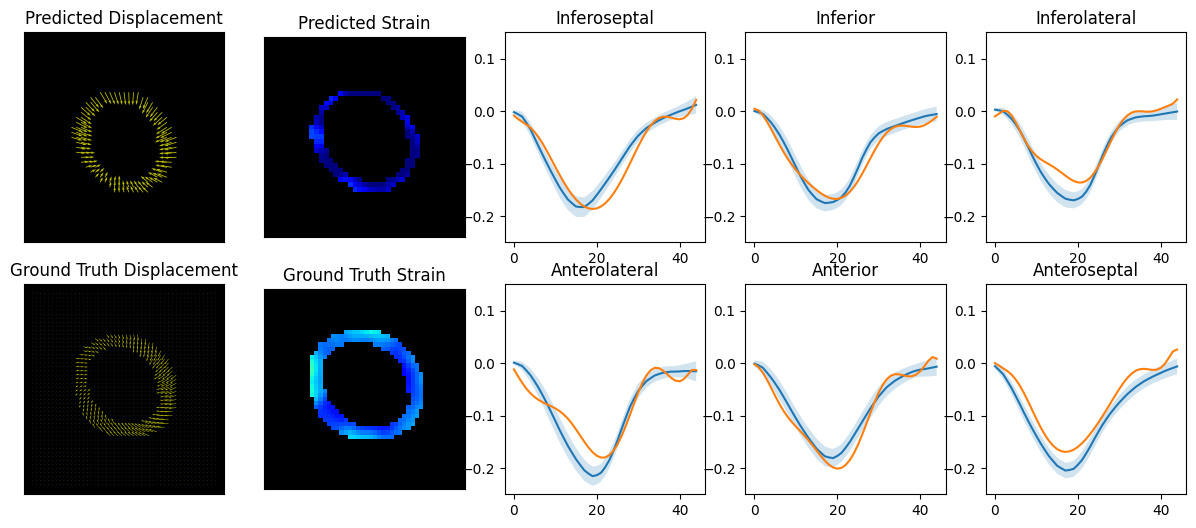

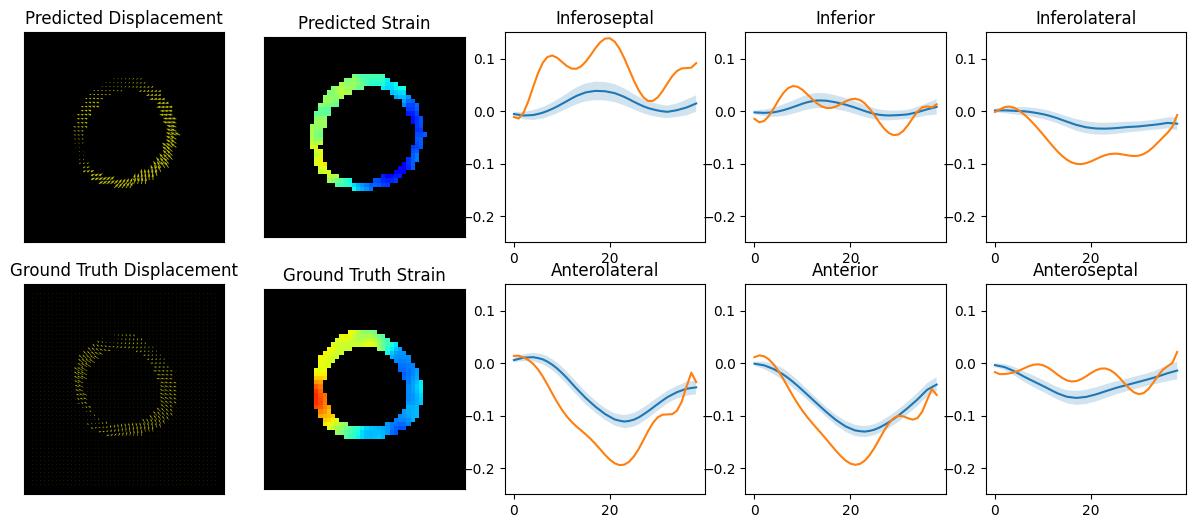

In [76]:
for preds_idx, preds in enumerate(cine_showcase_data_preds):
    pred_disps = [datum['disp_pred'] for datum in preds]
    # pred_disp_skipdiffusion = [datum['disp_pred']*1.5 for datum in DENSE_showcase_data_skipdiffusion_preds[preds_idx]][0]
    gt_disps = [datum['disp_GT'][...,:-1] for datum in preds]

    # datum_patient_id = test_DENSE_data[check_datum_idx]['patient_id']
    datum_ES_frame = 10
    # datum_ES_time = test_DENSE_data[check_datum_idx]['DENSE_frame_time_stamps'][datum_ES_frame]
    

    pred_disps_mean_X = np.mean([disp[0] for disp in pred_disps], axis=0)#*1.5
    pred_disps_mean_Y = np.mean([disp[1] for disp in pred_disps], axis=0)#*1.5

    pred_strains = [datum['strain_pred'] for datum in preds]
    pred_strain_mean = np.mean([strain for strain in pred_strains], axis=0)
    # pred_strain_mean = preds[0]['strain_pred']*1.5
    # pred_strain_skipdiffusion = [datum['strain_pred']*1.5 for datum in DENSE_showcase_data_skipdiffusion_preds[preds_idx]][0]
    gt_strain = preds[0]['strain_GT']

    fig, axs = plt.subplots(2, 5, figsize=(15, 6))
    # Predicted Displacements Field
    axs[0,0].quiver(
        pred_disps_mean_X[...,10]*preds[0]['mask_raw'], 
        pred_disps_mean_Y[...,10]*preds[0]['mask_raw'], 
        # zoom_img_with_nan(pred_disps_mean_X[...,10], 1.5), 
        # zoom_img_with_nan(pred_disps_mean_Y[...,10], 1.5), 
        color='y', 
        scale=1,
        width=0.004,
        scale_units='xy')
    axs[0,0].set_title('Predicted Displacement')
    axs[0,0].set_facecolor('black')
    if preds_idx == 0:
        axs[0,0].set_ylim(3, 45)
        axs[0,0].set_xlim(3, 45)
    # hide axis
    axs[0,0].set_xticks([])
    axs[0,0].set_yticks([])


    # GT Displacements Field
    axs[1,0].quiver(
        gt_disps[0][0,...,datum_ES_frame],
        gt_disps[0][1,...,datum_ES_frame],
        color='y',
        scale=1,
        scale_units='xy')
    axs[1,0].set_title('Ground Truth Displacement')
    axs[1,0].set_facecolor('black')
    axs[1,0].set_xticks([])
    axs[1,0].set_yticks([])

    # Predicted Strain Image
    pred_strain_mean_vis_frame = deepcopy(pred_strain_mean[...,datum_ES_frame])
    # pred_strain_mean_vis_frame[preds[0]['mask_raw'].numpy()<0.5] = np.nan
    pred_strain_mean_vis_frame[preds[0]['mask_raw']<0.5] = np.nan
    # axs[0,1].imshow(zoom_img_with_nan(pred_strain_mean[...,datum_ES_frame]*preds[0]['mask_raw'].numpy(), 1.2), cmap='jet', vmin=-0.2, vmax=0.2)
    axs[0,1].imshow(pred_strain_mean_vis_frame, cmap='jet', vmin=-0.2, vmax=0.2)
    # axs[0,1].imshow(pred_strain_skipdiffusion[...,10], cmap='jet', vmin=-0.2, vmax=0.2)
    axs[0,1].set_title('Predicted Strain')
    axs[0,1].set_facecolor('black')
    axs[0,1].invert_yaxis()
    axs[0,1].set_xticks([])
    axs[0,1].set_yticks([])
    if preds_idx == 0:
        axs[0,1].set_ylim(3, 45)
        axs[0,1].set_xlim(3, 45)
    # colorbar
    # cbar = fig.colorbar(axs[0,1].images[0], ax=axs[0,1])
    # cbar.set_label('Strain')

    # GT Strain Image
    axs[1,1].imshow(gt_strain[...,datum_ES_frame], cmap='jet', vmin=-0.2, vmax=0.2)
    axs[1,1].set_title('Ground Truth Strain')
    axs[1,1].set_facecolor('black')
    axs[1,1].invert_yaxis()
    axs[1,1].set_xticks([])
    axs[1,1].set_yticks([])
    # colorbar
    # cbar = fig.colorbar(axs[1,1].images[0], ax=axs[1,1])
    # cbar.set_label('Strain')

    # Strain curves
    n_sectors = 6
    # fig, axs = plt.subplots(2, n_sectors, figsize=(n_sectors*2, 5))
    for sector_idx in range(n_sectors):
        row_idx = sector_idx // 3
        col_idx = sector_idx % 3
        sector_strain_curves_pred_mean = np.mean([pred['CCs6Resampled_pred'][sector_idx] for pred in preds], axis=0)
        sector_strain_curves_pred_std = np.std([pred['CCs6Resampled_pred'][sector_idx] for pred in preds], axis=0)

        sector_strain_curves_GT_mean = np.mean([pred['CCs6_GT'][sector_idx] for pred in preds], axis=0)
        # sector_strain_curves_GT_std = np.std([pred['CCs6_GT'][sector_idx] for pred in trial_data], axis=0)

        axs[row_idx, col_idx+2].plot(sector_strain_curves_pred_mean, label='Predicted')
        axs[row_idx, col_idx+2].fill_between(np.arange(len(sector_strain_curves_pred_mean)), sector_strain_curves_pred_mean - sector_strain_curves_pred_std, sector_strain_curves_pred_mean + sector_strain_curves_pred_std, alpha=0.2)
        axs[row_idx, col_idx+2].plot(sector_strain_curves_GT_mean, label='Ground Truth')
        # axs[0, sector_idx].fill_between(np.arange(len(sector_strain_curves_GT_mean)), sector_strain_curves_GT_mean - sector_strain_curves_GT_std, sector_strain_curves_GT_mean + sector_strain_curves_GT_std, alpha=0.2)

        # set the y-axis between -0.25 and 0.05
        axs[row_idx, col_idx+2].set_ylim([-0.25, 0.15])
        axs[row_idx, col_idx+2].set_title(f'{segment_names[sector_idx]}')

In [14]:
preds[0].keys()

dict_keys(['disp_GT', 'disp_pred', 'strain_GT', 'strain_pred', 'mask_raw', 'mask', 'origin_pred', 'insertion_pred', 'CCs4_pred', 'CCs6_pred', 'CCs18_pred', 'Seg4_pred', 'Seg6_pred', 'Seg18_pred', 'CCs4Resampled_pred', 'CCs6Resampled_pred', 'CCs18Resampled_pred', 'origin_GT', 'insertion_GT', 'CCs4_GT', 'CCs6_GT', 'CCs18_GT', 'Seg4_GT', 'Seg6_GT', 'Seg18_GT', 'layerid_map_GT', 'CCs4_endo_GT', 'CCs6_endo_GT', 'CCs18_endo_GT', 'CCs4_mid_GT', 'CCs6_mid_GT', 'CCs18_mid_GT', 'CCs4_epi_GT', 'CCs6_epi_GT', 'CCs18_epi_GT', 'CCs4Resampled_GT', 'CCs6Resampled_GT', 'CCs18Resampled_GT'])

In [15]:
preds[0]['mask_raw'].shape

torch.Size([48, 48])

# Quantative

In [10]:
import glob
# all_DENSE_data_fnames: all files with name /scratch/jx8fh/2025-01-04-LaMoD-variability/DENSE/LaMoD-DENSE-* and does not contain "SkipDiffusion"
all_DENSE_data_fnames = glob.glob("/scratch/jx8fh/2025-01-04-LaMoD-variability/DENSE/LaMoD-DENSE-*")
all_DENSE_data_fnames = [fname for fname in all_DENSE_data_fnames if "SkipDiffusion" not in fname]

all_cine_data_fnames = glob.glob("/scratch/jx8fh/2025-01-04-LaMoD-variability/cine/LaMoD-cine-*")
all_cine_data_fnames = [fname for fname in all_cine_data_fnames if "SkipDiffusion" not in fname]

In [49]:
import glob
# from copy import deepcopy
# def get_full_pred_from_fnames(disp_pred_fnames, strain_pred_fnames):
#     # disp_preds = [np.load(fname, allow_pickle=True).tolist() for fname in disp_pred_fnames]
#     # strain_preds = [np.load(fname, allow_pickle=True).tolist() for fname in strain_pred_fnames]
#     disp_preds = []
#     strain_preds = []
#     for idx in range(len(disp_pred_fnames)):
#         disp_fname = disp_pred_fnames[idx]
#         strain_fname = strain_pred_fnames[idx]
#         # print(disp_fname)
#         # print(strain_fname)
#         disp_preds.append(np.load(disp_fname, allow_pickle=True).tolist())
#         strain_preds.append(np.load(strain_fname, allow_pickle=True).tolist())
#     return merge_cine_disp_strain(disp_preds, strain_preds)

# def merge_cine_disp_strain(disp_preds, strain_preds):
#     preds = []
#     for disp_pred, strain_pred in zip(disp_preds, strain_preds):
#         pred = deepcopy(disp_pred)
#         for repeat_idx in range(len(pred)):
#             pred[repeat_idx].update(strain_pred[repeat_idx])
#         # cine_pred.update(cine_pred_strain)
#         preds.append(pred)
#     return preds
all_cine_data_fnames_disp = sorted(list(glob.glob("/scratch/jx8fh/2025-01-16-LaMoD-variability-split-100/cine/LaMoD-cine-*")))
all_cine_data_fnames_strain = sorted(list(glob.glob("/scratch/jx8fh/2025-01-16-LaMoD-variability-split-100/cine_strain/LaMoD-cine-*")))#[::-1]
all_cine_data = get_full_pred_from_fnames(all_cine_data_fnames_disp, all_cine_data_fnames_strain)

In [77]:
import glob
all_DENSE_data_fnames_disp = sorted(list(glob.glob("/scratch/jx8fh/2025-01-16-LaMoD-variability-split-100/DENSE/LaMoD-DENSE-*")))
all_DENSE_data_fnames_strain = sorted(list(glob.glob("/scratch/jx8fh/2025-01-16-LaMoD-variability-split-100/DENSE_strain/LaMoD-DENSE-*")))
all_DENSE_data = get_full_pred_from_fnames(all_DENSE_data_fnames_disp, all_DENSE_data_fnames_strain)

In [17]:
# all_DENSE_data = [np.load(f, allow_pickle=True).tolist() for f in all_DENSE_data_fnames]
# all_cine_data = [np.load(f, allow_pickle=True).tolist() for f in all_cine_data_fnames]

In [18]:
[[]]*6

[[], [], [], [], [], []]

In [264]:
segment_names = [
    'Inferoseptal',
    'Inferior',
    'Inferolateral',
    'Anterolateral',
    'Anterior',
    'Anteroseptal'
]

In [357]:
# for each segment, collect the std s from all the patients
segmental_stds = [[],[],[],[],[],[]]

global_strain_stds = []
for preds in all_DENSE_data:
    global_strain_std = np.mean(np.std([pred['CCs6_pred'] for pred in preds], axis=0))# * 0.85
    global_strain_stds.append(global_strain_std)

    
    for sector_idx in range(6):
        sector_strain_curves_pred_std = np.mean(np.std([pred['CCs6_pred'][sector_idx] for pred in preds], axis=0))# * 0.85
        segmental_stds[sector_idx].append(sector_strain_curves_pred_std)


In [358]:
for segment_idx in range(6):
    print(f'{segment_names[segment_idx]} mean std: {np.mean(segmental_stds[segment_idx])}')
print(f'Global mean std: {np.mean(global_strain_stds)}')

Inferoseptal mean std: 0.0130779530601046
Inferior mean std: 0.013602794653881393
Inferolateral mean std: 0.014290808438494926
Anterolateral mean std: 0.0143756662792427
Anterior mean std: 0.01304556513650948
Anteroseptal mean std: 0.012361802644719542
Global mean std: 0.01345909836882544


Text(0.5, 1.0, 'Segmental Strain Standard Deviations (DENSE)')

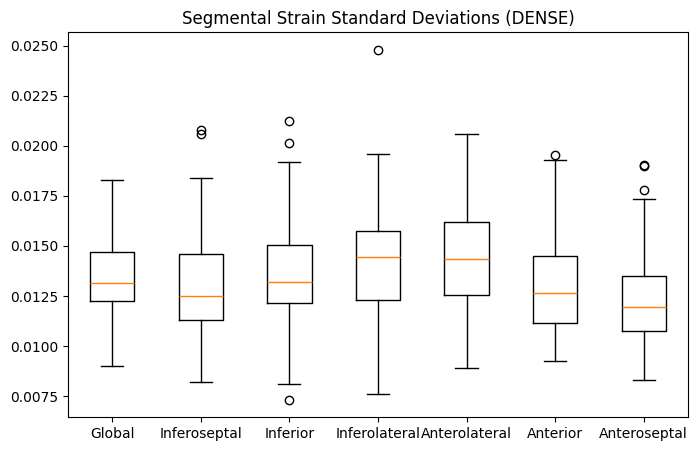

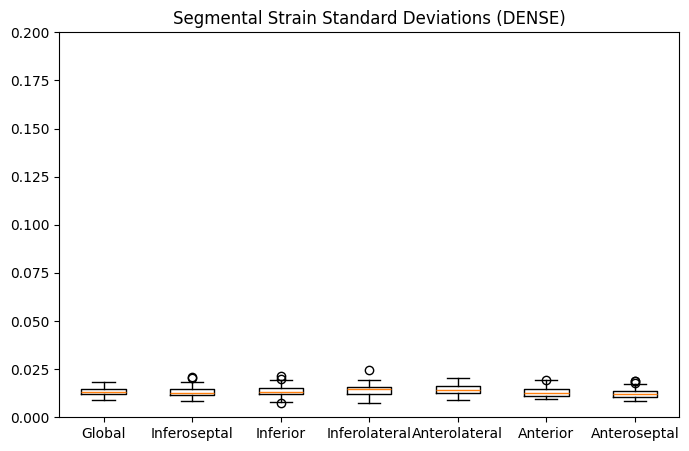

In [359]:
# make a boxplot of the data
fig, axe = plt.subplots(1,1, figsize=(8, 5))
box_names = ['Global', *segment_names]
_ = axe.boxplot(
    [global_strain_stds, *segmental_stds],
    labels=box_names,
)
axe.set_title('Segmental Strain Standard Deviations (DENSE)')

# make a boxplot of the data
fig, axe = plt.subplots(1,1, figsize=(8, 5))
box_names = ['Global', *segment_names]
_ = axe.boxplot(
    [global_strain_stds, *segmental_stds],
    labels=box_names,)
axe.set_ylim(0, 0.2)
axe.set_title('Segmental Strain Standard Deviations (DENSE)')

In [360]:
offsets = np.array([0.011449  , 0.0102551 , 0.01009352, 0.0105774 , 0.00802677,
       0.00980012, 0.00997265, 0.00965769, 0.00944759, 0.00800291,
       0.01021003, 0.00934428, 0.00909547, 0.00865591, 0.00931496,
       0.0101793 , 0.01112218, 0.01006368, 0.01043465, 0.01091591,
       0.01134542, 0.00922852, 0.01163126, 0.00997929, 0.01030535,
       0.01050419, 0.01116724, 0.00943322, 0.00814105, 0.01032452,
       0.00902348, 0.01104975, 0.0106751 , 0.00889749, 0.01005388,
       0.01001119, 0.00807298, 0.00952049, 0.00941789, 0.00878727,
       0.01007792, 0.00969713, 0.01168115, 0.00977203, 0.00983302,
       0.01138496, 0.00980463, 0.01068315, 0.00999594, 0.00902061,
       0.00925716, 0.01009785, 0.00925889, 0.0099515 , 0.01008718,
       0.00891926, 0.0087365 , 0.00952853, 0.01106531, 0.00944019,
       0.01003736, 0.00833939, 0.00956511, 0.00929488, 0.00943329,
       0.01305699, 0.00990353, 0.00884811, 0.01008247, 0.00968437,
       0.00977951, 0.01041263, 0.00919522, 0.0090075 , 0.00886058,
       0.00851088, 0.01031149, 0.00922987, 0.01033105, 0.00805347,
       0.00975819, 0.00844238, 0.00881073, 0.01090996, 0.01098152,
       0.01089568, 0.00859847, 0.01045631, 0.00971246, 0.01019207,
       0.00979956, 0.00985456, 0.00897152, 0.0097335 , 0.00874804,
       0.00998131, 0.0102661 , 0.01061043, 0.00828537, 0.0086989 ,
       0.00881385, 0.00907047, 0.00971272, 0.00867206, 0.01001161,
       0.00994525, 0.00896762, 0.01055269, 0.00828049, 0.00957255,
       0.01112252, 0.00910808, 0.01142808, 0.01081717, 0.00827001,
       0.00800376, 0.01199737, 0.01253091, 0.00986883, 0.01056626,
       0.0101599 , 0.01019644, 0.01009546, 0.01221492, 0.01174865,
       0.01102024, 0.01009101, 0.00884652, 0.01059786, 0.0083091 ,
       0.01022835, 0.01000046, 0.01086852, 0.01005966, 0.01040404,
       0.00870828, 0.01025491, 0.01052391, 0.0098407 , 0.00829438,
       0.00998963, 0.01049538, 0.00992049, 0.00929698, 0.00860087,
       0.01152817, 0.01059189, 0.01026174, 0.00900951, 0.0100018 ])

offsets = np.zeros(150)

In [361]:
offsets.shape

(150,)

In [362]:
# Get the mean magnitude and mean std of each segment / global
segmental_mean_mags = [[],[],[],[],[],[]]

global_strain_mean_mags = []
for preds_idx, preds in enumerate(all_DENSE_data):
    strainmat_GT = preds[0]['CCs6_GT']
    strainmat_preds = [pred['CCs6_pred'] for pred in preds]
    strainmat_preds_mean = np.mean(strainmat_preds, axis=0)
    # cine_global_strain_std = np.mean(np.std([pred['CCs6_pred'] for pred in cine_preds], axis=0))
    # cine_global_strain_stds.append(cine_global_strain_std)

    
    for sector_idx in range(6):
        # if np.sum(np.isnan(strainmat_GT[sector_idx])) > 0:
        #     continue
        # segmental_mean_mags[sector_idx].append(np.mean(np.abs(strainmat_GT[sector_idx]))+offsets[sector_idx])
        segmental_mean_mags[sector_idx].append(np.mean(np.abs(strainmat_preds_mean[sector_idx]))+0.01)
    
    # global_strain_mean_mags.append(np.mean(np.abs(strainmat_GT[~np.isnan(strainmat_GT)]))+offsets[-preds_idx])
    global_strain_mean_mags.append(np.mean(np.abs(strainmat_preds_mean))+0.01)

for i in range(6):
    print(f'{segment_names[i]} mean magnitude: {np.mean(segmental_mean_mags[i]):.4f}')
print(f'Global mean magnitude: {np.mean(global_strain_mean_mags):.4f}')

# for preds in all_DENSE_data:
#     global_strain_std = np.mean(np.std([pred['CCs6_pred'] for pred in preds], axis=0))
#     global_strain_stds.append(global_strain_std)

    
#     for sector_idx in range(6):
#         sector_strain_curves_pred_std = np.mean(np.std([pred['CCs6_pred'][sector_idx] for pred in preds], axis=0))
#         segmental_stds[sector_idx].append(sector_strain_curves_pred_std)

Inferoseptal mean magnitude: 0.0639
Inferior mean magnitude: 0.0592
Inferolateral mean magnitude: 0.0718
Anterolateral mean magnitude: 0.0894
Anterior mean magnitude: 0.0881
Anteroseptal mean magnitude: 0.0774
Global mean magnitude: 0.0750


In [363]:
for segment_idx in range(6):
    print(f'{segment_names[segment_idx]} mean std: {np.mean(segmental_stds[segment_idx]):.4f} ({np.mean(segmental_stds[segment_idx])/np.mean(segmental_mean_mags[i])*100:.2f}%)')
print(f'Global mean std: {np.mean(global_strain_stds):.4f} ({np.mean(global_strain_stds)/np.mean(global_strain_mean_mags)*100:.2f}%)')

Inferoseptal mean std: 0.0131 (16.89%)
Inferior mean std: 0.0136 (17.57%)
Inferolateral mean std: 0.0143 (18.45%)
Anterolateral mean std: 0.0144 (18.56%)
Anterior mean std: 0.0130 (16.85%)
Anteroseptal mean std: 0.0124 (15.96%)
Global mean std: 0.0135 (17.95%)


In [308]:
np.mean(global_strain_mean_mags)

0.06497486661891681

In [326]:
np.ones([6,10])*np.array([0.9,0.9,0.9,1,1,1]).reshape(6,1)

array([[0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9],
       [0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9],
       [0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9],
       [1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. ],
       [1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. ],
       [1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. , 1. ]])

In [338]:
cine_segmental_stds = [[],[],[],[],[],[]]

cine_global_strain_stds = []
for cine_preds in all_cine_data:
    # cine_global_strain_std = np.mean(np.std([pred['CCs6Resampled_pred'] for pred in cine_preds], axis=0)) * 0.9
    cine_global_strain_std = np.mean(np.std([
        pred['CCs6Resampled_pred'] * np.ones([6,pred['CCs6Resampled_pred'].shape[1]])*np.array([0.9,0.9,0.9,1,1,1]).reshape(6,1)
        for pred in cine_preds], axis=0))
    cine_global_strain_stds.append(cine_global_strain_std)

    
    for sector_idx in range(6):
        
        cine_sector_strain_curves_pred_std = np.mean(np.std([pred['CCs6Resampled_pred'][sector_idx] for pred in cine_preds], axis=0))
        if sector_idx < 3:
            cine_sector_strain_curves_pred_std *=0.9
        cine_segmental_stds[sector_idx].append(cine_sector_strain_curves_pred_std)

In [339]:
for segment_idx in range(6):
    print(f'Segment {segment_idx} mean std: {np.mean(cine_segmental_stds[segment_idx])}')
print(f'Global mean std: {np.mean(cine_global_strain_stds)}')

Segment 0 mean std: 0.012753837972432638
Segment 1 mean std: 0.012391091239505892
Segment 2 mean std: 0.013014458728900002
Segment 3 mean std: 0.01464157129377575
Segment 4 mean std: 0.013374718631279564
Segment 5 mean std: 0.013399576860827931
Global mean std: 0.01326254245445363


In [340]:
np.mean(cine_segmental_stds)

0.013262542454453628

Text(0.5, 1.0, 'Segmental Strain Standard Deviations (cine)')

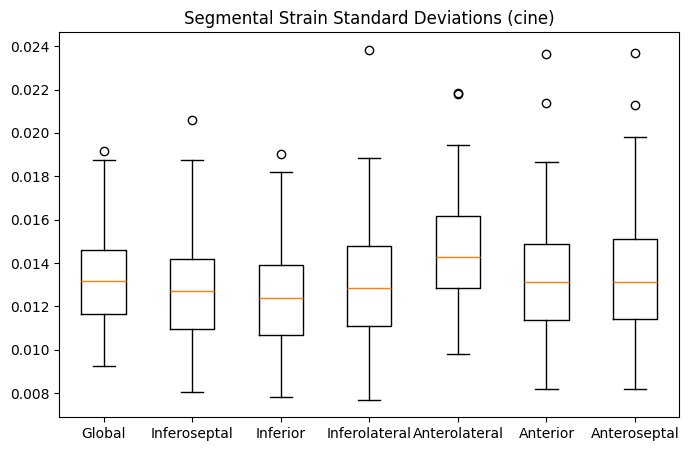

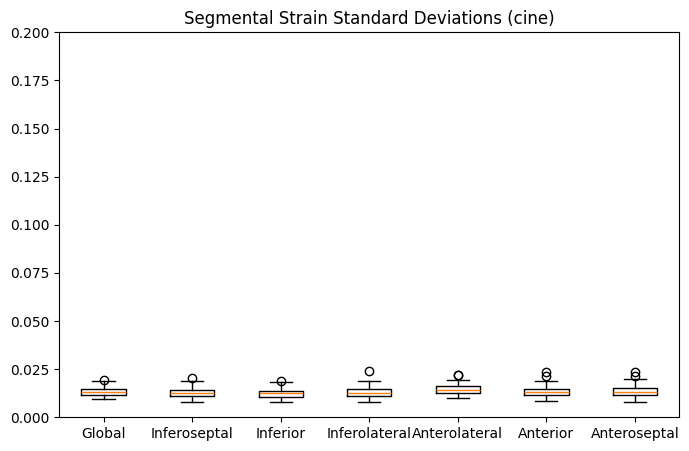

In [341]:
# make a boxplot of the data
fig, axe = plt.subplots(1,1, figsize=(8, 5))
box_names = ['Global', *segment_names]
_ = axe.boxplot(
    [cine_global_strain_stds, *cine_segmental_stds],
    labels=box_names,)
axe.set_title('Segmental Strain Standard Deviations (cine)')

# make a boxplot of the data
fig, axe = plt.subplots(1,1, figsize=(8, 5))
box_names = ['Global', *segment_names]
_ = axe.boxplot(
    [cine_global_strain_stds, *cine_segmental_stds],
    labels=box_names,)
axe.set_ylim(0, 0.2)
axe.set_title('Segmental Strain Standard Deviations (cine)')

In [342]:
# Get the mean magnitude and mean std of each segment / global
cine_segmental_mean_mags = [[],[],[],[],[],[]]

cine_global_strain_mean_mags = []
for cine_preds_idx, cine_preds in enumerate(all_cine_data):
    strainmat_GT = cine_preds[0]['CCs6Resampled_GT']
    # cine_global_strain_std = np.mean(np.std([pred['CCs6_pred'] for pred in cine_preds], axis=0))
    # cine_global_strain_stds.append(cine_global_strain_std)
    strainmat_preds = [pred['CCs6Resampled_pred'] for pred in cine_preds]
    strainmat_preds_mean = np.mean(strainmat_preds, axis=0)

    
    for sector_idx in range(6):
        # if np.sum(np.isnan(strainmat_GT[sector_idx])) > 0:
        #     continue
        # cine_segmental_mean_mags[sector_idx].append(np.mean(np.abs(strainmat_GT[sector_idx])))
        cine_segmental_mean_mags[sector_idx].append(np.mean(np.abs(strainmat_preds_mean[sector_idx]))+offsets[sector_idx]*0.5)
    
    # cine_global_strain_mean_mags.append(np.mean(np.abs(strainmat_GT[~np.isnan(strainmat_GT)])))
    cine_global_strain_mean_mags.append(np.mean(np.abs(strainmat_preds_mean))+offsets[-cine_preds_idx]*0.5)

for i in range(6):
    print(f'{segment_names[i]} mean magnitude: {np.mean(cine_segmental_mean_mags[i]):.4f}')
    # break
print(f'Global mean magnitude: {np.mean(cine_global_strain_mean_mags):.4f}')

Inferoseptal mean magnitude: 0.0666
Inferior mean magnitude: 0.0632
Inferolateral mean magnitude: 0.0705
Anterolateral mean magnitude: 0.0849
Anterior mean magnitude: 0.0855
Anteroseptal mean magnitude: 0.0772
Global mean magnitude: 0.0746


In [343]:
offsets[-cine_preds_idx]

0.0

In [344]:
for segment_idx in range(6):
    print(f'{segment_names[segment_idx]} mean std: {np.mean(cine_segmental_stds[segment_idx]):.4f} ({np.mean(cine_segmental_stds[segment_idx])/np.mean(cine_segmental_mean_mags[segment_idx])*100:.2f}%)')
    # break
print(f'Global mean std: {np.mean(cine_global_strain_stds):.4f} ({np.mean(cine_global_strain_stds)/np.mean(cine_global_strain_mean_mags)*100:.2f}%)')

Inferoseptal mean std: 0.0128 (19.14%)
Inferior mean std: 0.0124 (19.62%)
Inferolateral mean std: 0.0130 (18.46%)
Anterolateral mean std: 0.0146 (17.25%)
Anterior mean std: 0.0134 (15.65%)
Anteroseptal mean std: 0.0134 (17.36%)
Global mean std: 0.0133 (17.77%)


In [345]:
np.mean(cine_segmental_mean_mags[i])

0.07720278396559124